<a href="https://colab.research.google.com/github/CharlesR-W/HFCourses/blob/main/HFAudioCourseHandsOn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install datasets transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system =

In [13]:
from datasets import load_dataset
vox = load_dataset("facebook/voxpopuli","en",split="train",streaming=True)

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

voxpopuli.py:   0%|          | 0.00/8.84k [00:00<?, ?B/s]

The repository for facebook/voxpopuli contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/facebook/voxpopuli.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [17]:
examples = vox.take(3)
example = list(examples)[2]

In [19]:
example

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

"Given the features that this example has, what kinds of audio tasks can you use this dataset for?"

It's an audio, but with no speaker id.  You can do classification tasks of varying kinds, and asr.  I don't think you could readily do transcription

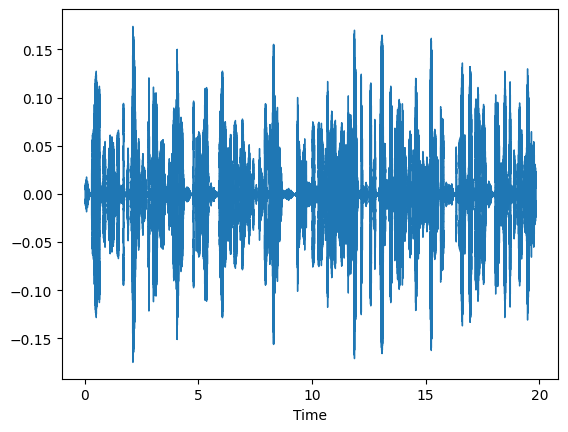

In [25]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

audio = example["audio"]
array, sample_rate = audio["array"], audio["sampling_rate"]

librosa.display.waveshow(array, sr=sample_rate)

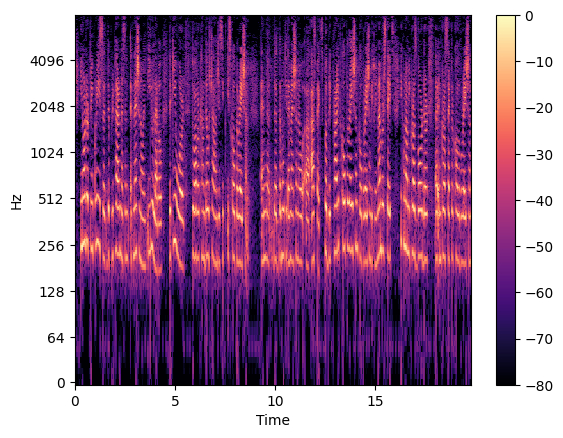

In [26]:
#AMPLITUDE spectrogram, not power
D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

librosa.display.specshow(S_db, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

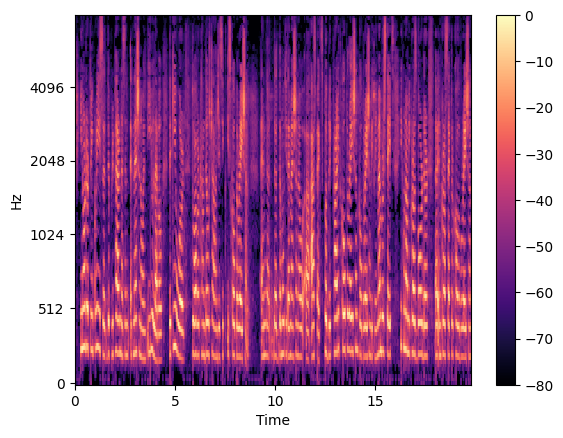

In [29]:
S = librosa.feature.melspectrogram(y=array, sr=sample_rate, fmax=8000)
S_db = librosa.power_to_db(S, ref=np.max)

librosa.display.specshow(S_db, sr=sample_rate, fmax=8000, x_axis='time', y_axis='mel')
plt.colorbar()

In [33]:
from transformers import pipeline
asr = pipeline("automatic-speech-recognition", model="openai/whisper-tiny")
transcribed = asr(array)
correct = example["raw_text"]

print("Transcribed text:\n" + transcribed["text"])
print("Correct text:\n" + correct)

Device set to use cpu


Transcribed text:
 In order to increase the preparedness and national and EU level, the key word to overcome those challenges is cooperation. And the multidimensional aspects, public private cooperation, cooperation between member states, economic cross border, and cross sector collaboration.
Correct text:
In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,
